<a href="https://colab.research.google.com/github/NishatTasnim01/Numerical-Methods/blob/main/21201149_Newton_Raphson_%26_Secant_Method.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

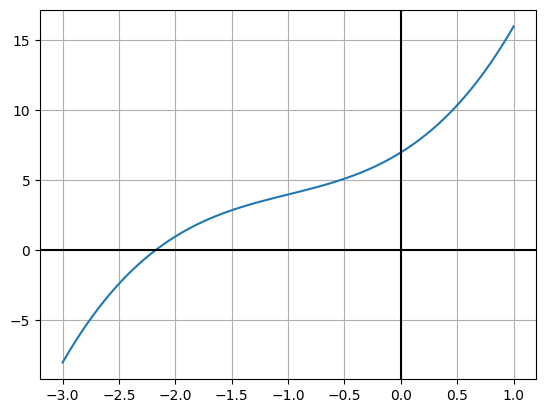

In [ ]:
def non_linear_func(x):
    return x**3 + 3*x**2 + 5*x + 7

x = np.linspace(-3, 1, 1000)
y = non_linear_func(x)

plt.plot(x, y)
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.grid()
plt.show()

In [ ]:
def f_prime(x):
    return 3*x**2 + 6*x + 5

In [ ]:
def arae(x_prev, x_pres):
    return abs((x_pres - x_prev) / x_pres) * 100

In [ ]:
def plot(f, f_prime, x0, new_x):
    x = np.linspace(-3, 1, 1000)
    y = f(x)

    plt.plot(x, y, 'b', label='f(x)', linewidth=2)
    plt.axhline(y=0, color='k')
    plt.axvline(x=0, color='k')
    plt.axvline(x=new_x, color='g', linestyle='--', label='$x_{i+1}$')

    x1 = np.linspace(x0-0.5, x0+0.5, 100)
    y1 = f_prime(x0) * (x1 - x0) + f(x0)

    plt.plot(x1, y1, 'r', label="f'(x)")
    plt.axvline(x=x0, color='orange', linestyle='--', label='$x_{i}$')
    plt.scatter(x0, f(x0), color='r')
    plt.grid()
    plt.legend()
    plt.show()

# Newton-Raphson method
def newton_raphson(f, f_prime, x0, error_tol, max_iter):
    error = 1e10
    for i in range(max_iter):
        x = x0 - f(x0) / f_prime(x0)
        plot(f, f_prime, x0, x)
        error = arae(x0, x)
        if error < error_tol:
            print("Converged")
            print(f"Error after iteration {i+1}: {error}")
            return x
        x0 = x
        print(f"Value of x after iteration {i+1}: {x}")
        print(f"Error after iteration {i+1}: {error}")
        print()
    return x

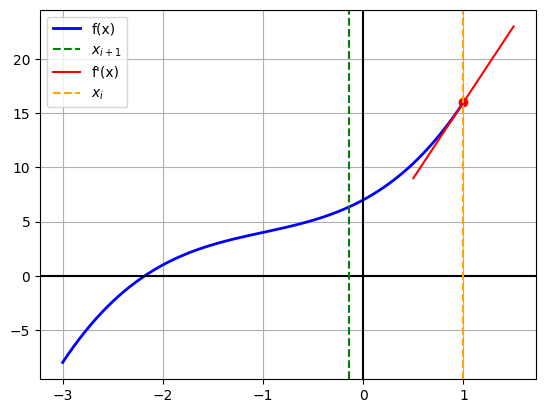

Value of x after iteration 1: -0.1428571428571428
Error after iteration 1: 800.0000000000003



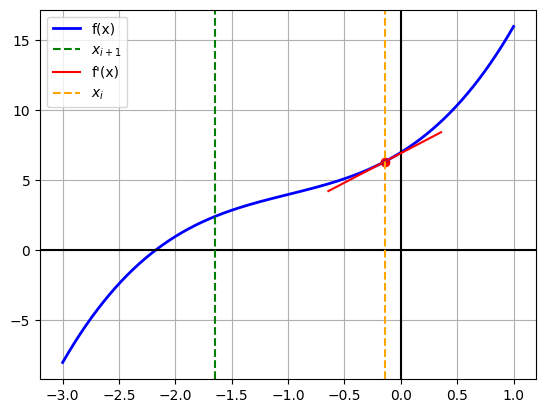

Value of x after iteration 2: -1.6518723994452147
Error after iteration 2: 91.3518052057095



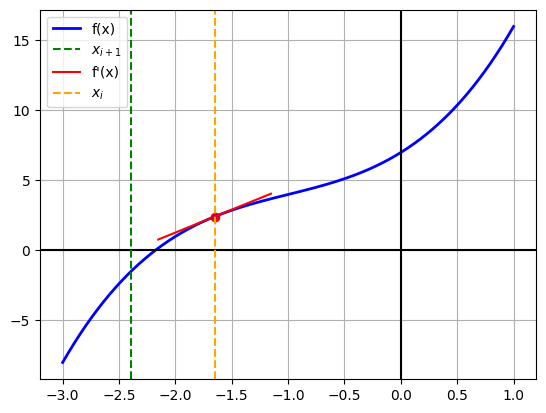

Value of x after iteration 3: -2.3906169273846274
Error after iteration 3: 30.901836236373132



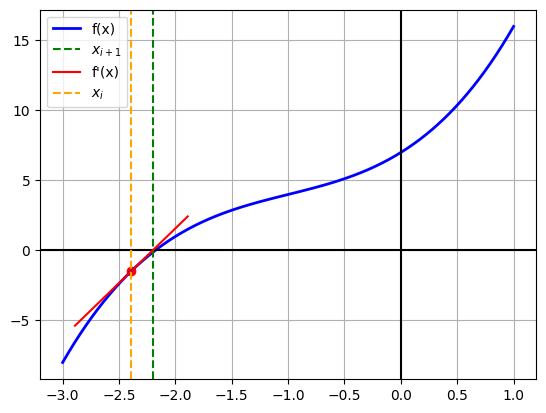

Value of x after iteration 4: -2.2021351666049247
Error after iteration 4: 8.559045949494951



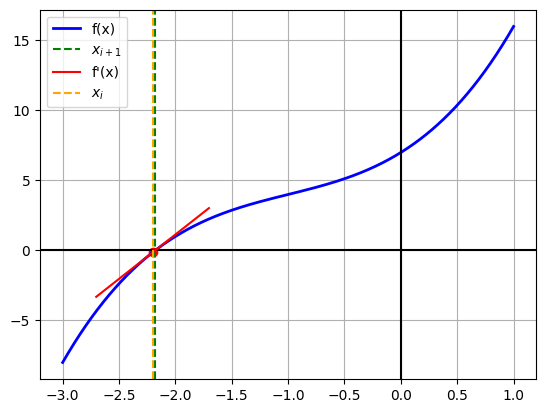

Value of x after iteration 5: -2.179798618323036
Error after iteration 5: 1.0247069657780077



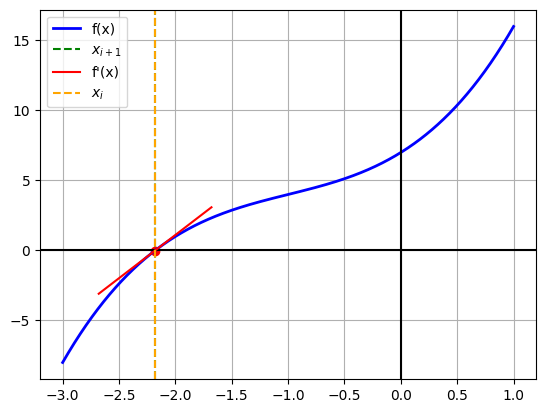

Value of x after iteration 6: -2.1795090726625514
Error after iteration 6: 0.013284902738698798



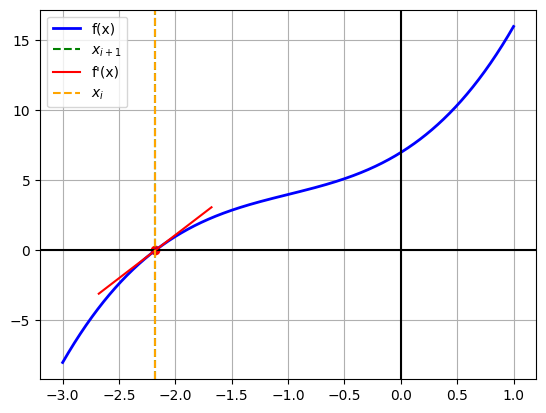

Converged
Error after iteration 7: 2.205066949459772e-06
Estimated root: -2.1795090246029183


In [ ]:
x0 = 1
error_tol = 0.01
max_iter = 100

root = newton_raphson(non_linear_func, f_prime, x0, error_tol, max_iter)
print("Estimated root:", root)

# **Secant Method :**

In [ ]:
def plot_secant(f, x0, x1, new_x):
    x = np.linspace(-3, 1.5, 1000)
    y = f(x)

    plt.plot(x, y, 'b', label='f(x)', linewidth=2)
    plt.axhline(y=0, color='k')
    plt.axvline(x=0, color='k')
    plt.axvline(x=new_x, color='g', linestyle='--', label='$x_{i+1}$')

    sec_x = np.array([x0, x1])
    sec_y = f(sec_x)
    slope = (sec_y[1] - sec_y[0]) / (x1 - x0)
    x_sec = np.linspace(x0, x1, 100)
    y_sec = slope * (x_sec - x0) + f(x0)

    plt.plot(x_sec, y_sec, 'r', label='Secant line')
    plt.axvline(x=x0, color='orange', linestyle='--', label='$x_{i}$')
    plt.axvline(x=x1, color='purple', linestyle='--', label='$x_{i-1}$')
    plt.scatter([x0, x1], [f(x0), f(x1)], color='r')
    plt.grid()
    plt.legend()
    plt.show()

In [ ]:
def secant_method(f, x0, x1, error_tol, max_iter):
    error = 1e10
    for i in range(max_iter):
        # Calculate the next approximation using the Secant Method formula
        x_new = x1 - (f(x1) * (x1 - x0)) / (f(x1) - f(x0))
        plot_secant(f, x0, x1, x_new)
        error = arae(x1, x_new)
        if error < error_tol:
            print("Converged")
            print(f"Error after iteration {i+1}: {error}")
            return x_new
        # Update values for the next iteration
        x0, x1 = x1, x_new
        print(f"Value of x after iteration {i+1}: {x_new}")
        print(f"Error after iteration {i+1}: {error}")
        print()
    return x_new

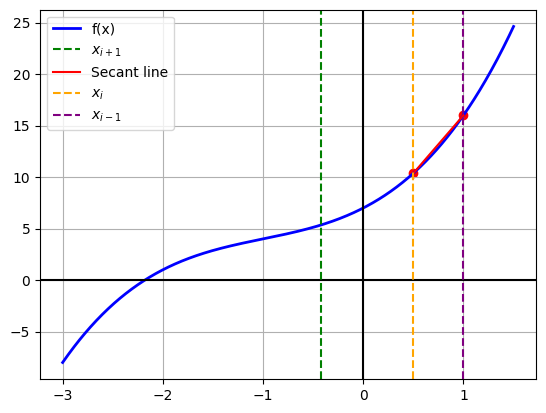

Value of x after iteration 1: -0.4222222222222223
Error after iteration 1: 336.84210526315786



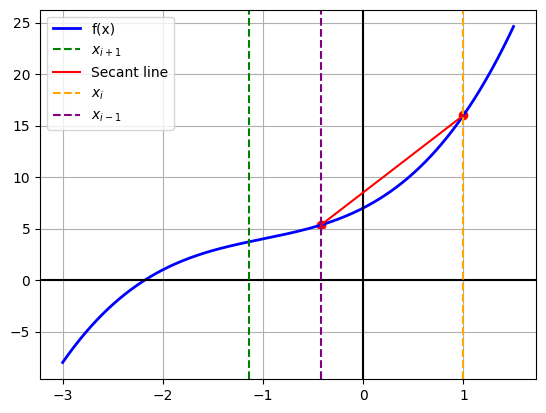

Value of x after iteration 2: -1.1363576420941581
Error after iteration 2: 62.84424844944747



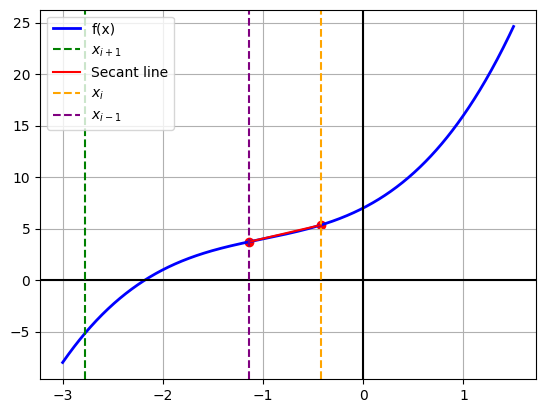

Value of x after iteration 3: -2.77459222069307
Error after iteration 3: 59.04415670096901



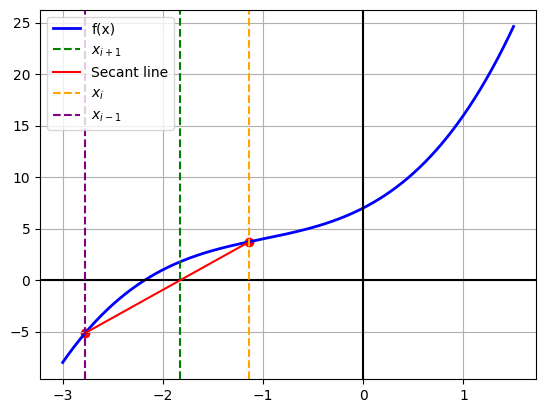

Value of x after iteration 4: -1.8248828507669428
Error after iteration 4: 52.04221024527648



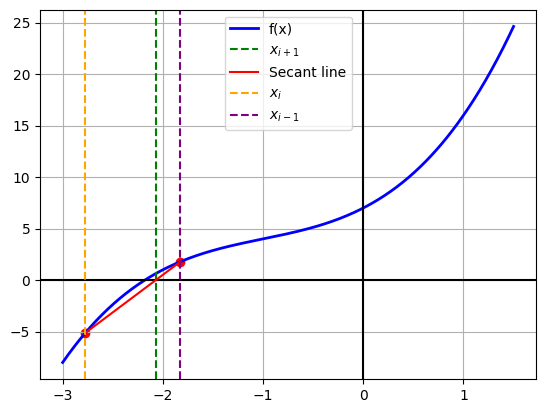

Value of x after iteration 5: -2.070165989326018
Error after iteration 5: 11.848476876916118



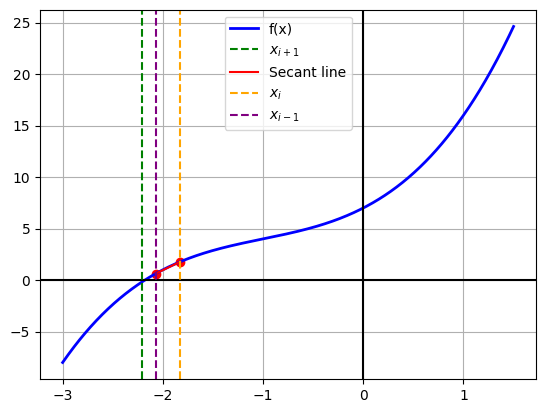

Value of x after iteration 6: -2.2048292026429333
Error after iteration 6: 6.107648300171931



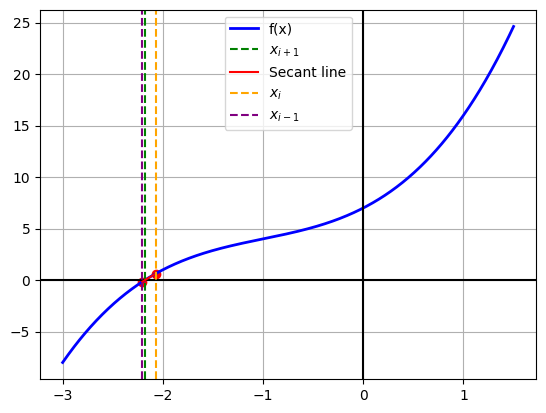

Value of x after iteration 7: -2.1778842020243774
Error after iteration 7: 1.2372099762471334



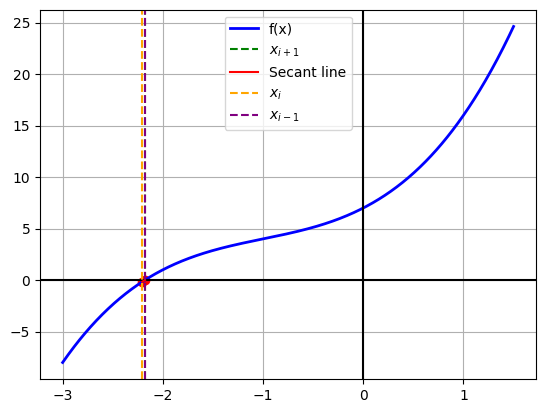

Value of x after iteration 8: -2.1794856068020647
Error after iteration 8: 0.07347627223090752



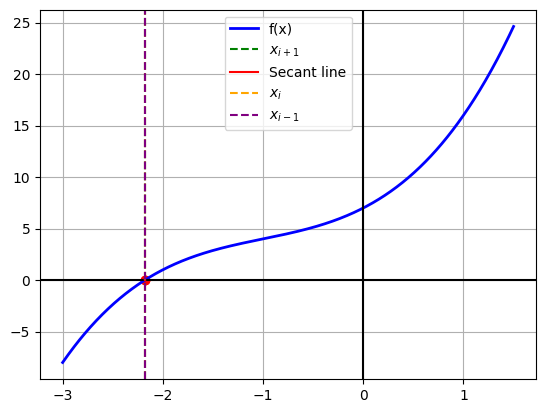

Converged
Error after iteration 9: 0.0010754541217427047
Estimated root: -2.179509046421938


In [ ]:
x0 = 0.5
x1 = 1
error_tol = 0.01
max_iter = 100

root = secant_method(non_linear_func, x0, x1, error_tol, max_iter)
print("Estimated root:", root)